(0.07758139073848724, (147, 429), 0.5)
(0.1542651355266571, (773, 87), 0.5789473684210527)
(0.13180214166641235, (719, 51), 0.6578947368421053)
(0.07806186378002167, (510, 65), 0.7368421052631579)
(0.0677206739783287, (482, 45), 0.8157894736842105)
(0.047120656818151474, (262, 88), 0.8947368421052632)
(0.054525669664144516, (373, 284), 0.9736842105263157)
(0.16679760813713074, (185, 97), 1.0526315789473684)
(0.3403080403804779, (139, 40), 1.131578947368421)
(0.6283653974533081, (93, 3), 1.2105263157894737)
Best match value: 0.6283653974533081 at scale: 1.2105263157894737


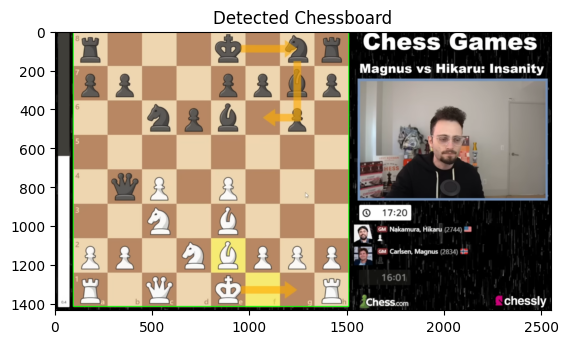

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the test image and template (chessboard)
test_image = cv2.imread('test_image.png', cv2.IMREAD_COLOR)
template = cv2.imread('chessboard.png', cv2.IMREAD_COLOR)

# Convert both images to grayscale
test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Get the width and height of the template
template_h, template_w = template_gray.shape[:2]

# Multi-scale template matching with better scaling
found = None
scale_range = np.linspace(0.5, 2, 20)  # Narrow down the scale range
best_match = None
best_scale = 1.0
threshold = 0.5  # Threshold for match quality

# Loop over scales
for scale in scale_range:
    # Resize the template according to the current scale
    resized_template = cv2.resize(template_gray, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

    # Skip scales where the template is larger than the test image
    if resized_template.shape[0] > test_gray.shape[0] or resized_template.shape[1] > test_gray.shape[1]:
        continue

    # Template Matching using cv2.matchTemplate
    result = cv2.matchTemplate(test_gray, resized_template, cv2.TM_CCOEFF_NORMED)

    # Get the maximum correlation value and its location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    print((max_val, max_loc, scale))
    # Apply threshold to filter out bad matches
    if max_val > threshold:
        # Save the best match found so far
        if found is None or max_val > found[0]:
            found = (max_val, max_loc, scale)

# Extract the best match information
if found:
    (max_val, max_loc, best_scale) = found
    print(f"Best match value: {max_val} at scale: {best_scale}")

    # Reload the test image to reset any drawings from previous runs
    test_image = cv2.imread('test_image.png', cv2.IMREAD_COLOR)

    # Resize the template to the best scale
    best_template = cv2.resize(template, None, fx=best_scale, fy=best_scale, interpolation=cv2.INTER_AREA)

    # Draw a rectangle around the detected area in the test image
    (top_left_x, top_left_y) = max_loc
    bottom_right_x = top_left_x + best_template.shape[1]
    bottom_right_y = top_left_y + best_template.shape[0]

    cv2.rectangle(test_image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 3)

    # Display the result
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Chessboard')
    plt.show()

else:
    print("No match found")
